In [6]:
import numpy as np
import fiducial as fid
import matplotlib.pyplot as plt
import utils as u
import Eg_cov as egcov
import pyccl as ccl

Check what happens to the linear scale cuts when you use a modified gravity theory.

Set up parameters etc

In [7]:
lens = 'DESI'
src = 'LSSTY10'
#rp0 = 1.5
Pimax=900.
#rp_bin_edges = np.logspace(np.log10(rp0), np.log10(50.), 11)
endfilename='_Oct2025'
#rp_bin_c = u.rp_bins_mid(rp_bin_edges)
# Let's use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

b1 = 2.33
#b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
#bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

Omrc = 0.25
H0rc = np.sqrt(4*Omrc)
print('H0rc=', H0rc)

# A_s designed to match sigma8 with other cosmological parameters
params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'sigma8':0.82,'b':b1, 'OmM': 0.292, 'fR0' : 10**(-4), 'A_s':2.115 * 10**(-9), 'fR_n': 1, 'H0rc':H0rc} 


H0rc= 1.0


In [8]:
# Figure out As corresponding to this sigma8 in LCDM and use.
cosmo_fid = ccl.Cosmology(Omega_c = params['OmM'] - params['OmB'], Omega_b = params['OmB'], h = params['h'], A_s = 2.115 * 10**(-9), n_s = params['n_s'], mu_0 = params['mu_0'], sigma_0 = params['sigma_0'])

sig8 = ccl.sigma8(cosmo_fid)
print(sig8)

0.8199671393753717


In [9]:
rp0 = 1.5

rp_bin_c_raw = np.loadtxt('../data_for_Danielle/test-HOD-PB00-z0.75-w1pz_cat-zRSD-model-5-gxm-sel-crossparticles-wtag-w1-rfact10-bin1-wp-logrp-pi-NJN-100.txt.upsilon')[:,0]
rp_bin_edges_raw = u.rp_bin_edges_log(rp_bin_c_raw)
#Cut below rp0 making sure rp0 is in the lowest bin. Go one bin lower because this 
ind = next(j[0] for j in enumerate(rp_bin_edges_raw) if j[1]>rp0)
rp_bin_c = rp_bin_c_raw[ind:][4:]
rp_bin_edges = rp_bin_edges_raw[ind:][4:]

print('rp bin c=', rp_bin_c)
print('rp bin edges=', rp_bin_edges)

rp bin c= [ 5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
rp bin edges= [  4.83205129   6.36988417   8.39714273  11.06958999  14.5925616   19.23674266  25.35896564  33.42962733  44.0688315   58.09403408  76.5828519  100.95586057]


Get data covariance matrices for E_G and the joint probes case.

In [10]:
Dcov_jp_raw = np.loadtxt('../txtfiles/sims_cov_Msolunits_LSSTY10_addSNmat.dat')

Dcov_jp = np.delete(np.delete(Dcov_jp_raw, [0,1,2,3,15,16,17,18], axis=0), [0,1,2,3,15,16,17,18], axis=1)

In [11]:
Dcov_eg_raw = np.loadtxt('../txtfiles/sim_eg_cov_Y10_addSN.dat')
Dcov_eg = Dcov_eg_raw[4:,4:]

print(Dcov_eg.shape)

(11, 11)


Get the linear and nonlinear datavector for E_G

In [12]:
# Get linear datavector
data_lin_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=False, MG=True, MGtheory='fR')

getting Upgm
maxchi= 6669.353003473356
end of upsgm binned
getting Upgg


In [13]:
# Get nonlinear datavector
data_nl_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=True, nl_bias=False, MG=True, MGtheory='fR')

getting Upgm
Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... done.
Training the emulator at aexp=1.0000... done.
pk_ratio_reshape shape= (50, 11238)
Pk_nl shape= (50, 11238)
shape of ratio= 50
shape Pk_return= (50, 40000)


/home/ncl117/research/EG_forecasts/code/fiducial.py:482: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  Pipos = scipy.logspace(np.log10(0.0001), np.log10(Pi_extent),300)
/home/ncl117/research/EG_forecasts/code/specs.py:117: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  z = scipy.linspace(z_min, z_max, 100)
/home/ncl117/research/EG_forecasts/code/utils.py:94: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  z_vec = scipy.linspace(0., 10., 4000) # This hardcodes that we don't care about anything over z=2100
/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",


maxchi= 6669.353003473356


/home/ncl117/research/EG_forecasts/code/utils.py:17: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  R_f_ = scipy.logspace(np.log10(R_[0]), np.log10(R_[-1]), 10000)


end of upsgm binned
getting Upgg


/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",


Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... done.
Training the emulator at aexp=1.0000... done.
pk_ratio_reshape shape= (50, 11238)
Pk_nl shape= (50, 11238)
shape of ratio= 50
shape Pk_return= (50, 40000)


/home/ncl117/research/EG_forecasts/code/fiducial.py:262: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  Pipos = scipy.logspace(np.log10(0.0001), np.log10(Pimax),300)
/home/ncl117/research/EG_forecasts/code/utils.py:17: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  R_f_ = scipy.logspace(np.log10(R_[0]), np.log10(R_[-1]), 10000)


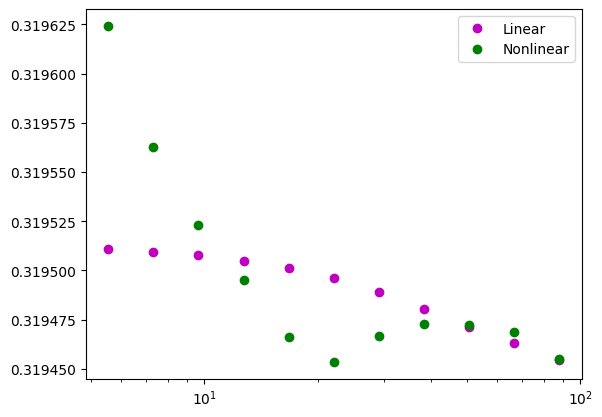

In [14]:
plt.figure()
plt.semilogx(rp_bin_c, data_lin_EG, 'mo', label='Linear')
plt.semilogx(rp_bin_c, data_nl_EG, 'go', label='Nonlinear')
plt.legend()
plt.show()

Get scale cuts for Eg

In [15]:
cut_inds_Eg = u.linear_scale_cuts_hartlap(data_nl_EG, data_lin_EG, Dcov_eg, rp_bin_c, covsamps=100)

chi2_in= 0.0015533358147092856 , no cuts


In [16]:
print("cut indices=", cut_inds_Eg)

cut indices= []


Now get the linear and nonlinear data vectors for the joint probes case

In [17]:
data_lin_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = False, MG=True, MGtheory='fR')
data_nl_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = True, nl_bias=False, MG=True, MGtheory='fR')

/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",
/home/ncl117/research/EG_forecasts/code/fiducial.py:262: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  Pipos = scipy.logspace(np.log10(0.0001), np.log10(Pimax),300)
/home/ncl117/research/EG_forecasts/code/utils.py:17: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  R_f_ = scipy.logspace(np.log10(R_[0]), np.log10(R_[-1]), 10000)
/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",
/home/ncl117/research/EG_forecasts/code/fiducial.py:482: DeprecationWarning: scipy.logspace is depreca

maxchi= 6669.353003473356
end of upsgm binned


/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",


Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... done.
Training the emulator at aexp=1.0000... done.
pk_ratio_reshape shape= (50, 11238)
Pk_nl shape= (50, 11238)
shape of ratio= 50
shape Pk_return= (50, 40000)


/home/ncl117/research/EG_forecasts/code/fiducial.py:262: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  Pipos = scipy.logspace(np.log10(0.0001), np.log10(Pimax),300)
/home/ncl117/research/EG_forecasts/code/utils.py:17: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  R_f_ = scipy.logspace(np.log10(R_[0]), np.log10(R_[-1]), 10000)
/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",
/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",


Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... done.
Training the emulator at aexp=1.0000... done.
pk_ratio_reshape shape= (50, 11238)
Pk_nl shape= (50, 11238)
shape of ratio= 50
shape Pk_return= (50, 40000)


/home/ncl117/research/EG_forecasts/code/fiducial.py:482: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  Pipos = scipy.logspace(np.log10(0.0001), np.log10(Pi_extent),300)
/home/ncl117/research/EG_forecasts/code/specs.py:117: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  z = scipy.linspace(z_min, z_max, 100)
/home/ncl117/research/EG_forecasts/code/utils.py:94: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  z_vec = scipy.linspace(0., 10., 4000) # This hardcodes that we don't care about anything over z=2100
/home/ncl117/Software/egproj/lib/python3.10/site-packages/pyccl/cosmology.py:286: CCLDeprecationWarning: Neff will change from 3.046 to 3.044 in CCLv3.0.0.
  warn("Neff will change from 3.046 to 3.044 in CCLv3.0.0.",


maxchi= 6669.353003473356
end of upsgm binned


/home/ncl117/research/EG_forecasts/code/utils.py:17: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  R_f_ = scipy.logspace(np.log10(R_[0]), np.log10(R_[-1]), 10000)


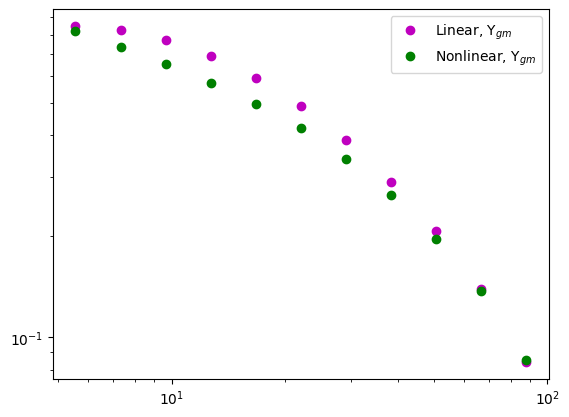

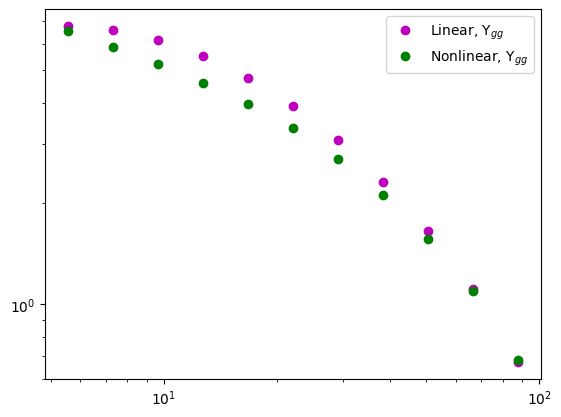

beta, lin= 0.3922268586351628
beta, nl= 0.3922268586351628


In [18]:
plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[0:len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gm}$')
plt.loglog(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gm}$')
plt.legend()
plt.show()

plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gg}$')
plt.loglog(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gg}$')
plt.legend()
plt.show()

# Check that beta is the same in the linear or nonlinear case
print("beta, lin=", data_lin_jp[-1])
print("beta, nl=", data_nl_jp[-1])

In [19]:
cut_inds_jp = u.linear_scale_cuts_hartlap(data_nl_jp, data_lin_jp, Dcov_jp, rp_bin_c, covsamps=100)

chi2_temp= [2152.30253853 2147.53846212 2149.799697   2009.23091643 2140.27664732 2159.38039323 2158.80424317 2148.39114665 2157.63632444 2110.25266977 2123.12398889 2043.78758407 2079.29816316 2036.53333998 2069.94701966 2088.25836514 2152.17513776
 2159.26774824 2118.31986451 2118.00223901 2145.05081755 2141.20039657 2034.3022184 ]
ind_min= 3
chi2_temp= [2033.15629887 2015.20079131 1978.39282866 2035.6324904  2034.59177969 2033.43923898 2030.38017388 2033.26194237 1993.09710542 2007.82398429 1903.33641085 1973.8965399  1937.3707438  1834.6839663  1985.89626344 2030.72779503 2035.31065556
 2009.6848711  2007.39319522 2028.60666638 2025.75376053 1939.15675418]
ind_min= 13
chi2_temp= [1847.72178879 1827.3523589  1803.56392402 1854.20133577 1858.42130886 1840.42525901 1857.64310483 1846.87057466 1828.07577606 1852.02001364 1786.95802558 1785.40699381 1631.88663389 1741.70621711 1857.92634946 1853.82930233 1854.58088423
 1844.98444987 1850.93714845 1841.78607391 1720.86546036]
ind_min= 12

In [20]:
print("cut indices=", cut_inds_jp)

cut indices= [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22]


For joint probes, we disect this to find the elements to cut for individual probes.

In [21]:
cut_indices_gm = [ind for ind in cut_inds_jp if ind<len(rp_bin_c)]
ind_keep_gm = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gm]
rp_keep_gm = rp_bin_c[ind_keep_gm]
Ups_keep_gm = data_nl_jp[ind_keep_gm]
print(zip(rp_keep_gm, Ups_keep_gm))

cut_indices_gg = [(ind-len(rp_bin_c)) for ind in cut_inds_jp if ind>=len(rp_bin_c)]
ind_keep_gg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
ind_keep_gg_dvec = [ind+len(rp_bin_c) for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
rp_keep_gg = rp_bin_c[ind_keep_gg]
Ups_keep_gg = data_nl_jp[ind_keep_gg_dvec]
print(zip(rp_keep_gg, Ups_keep_gg))

ind_keep_Eg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_inds_Eg]
rp_keep_Eg = rp_bin_c[ind_keep_Eg]
Eg_keep = data_nl_EG[ind_keep_Eg]

Plot the data points this tells us to keep for joint probes (not many)

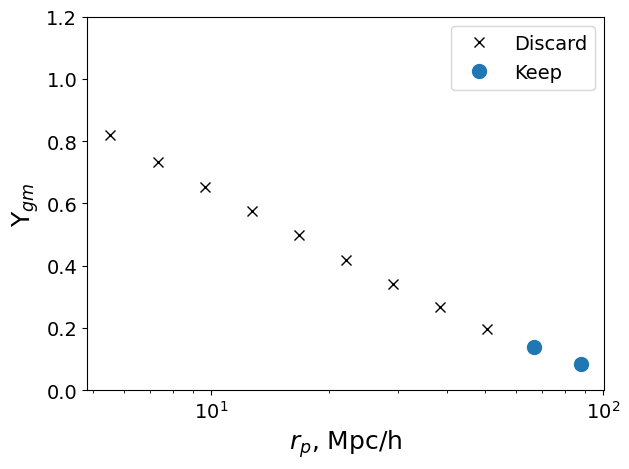

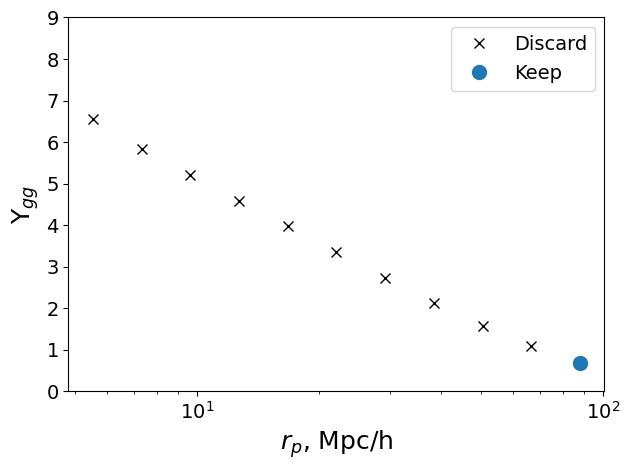

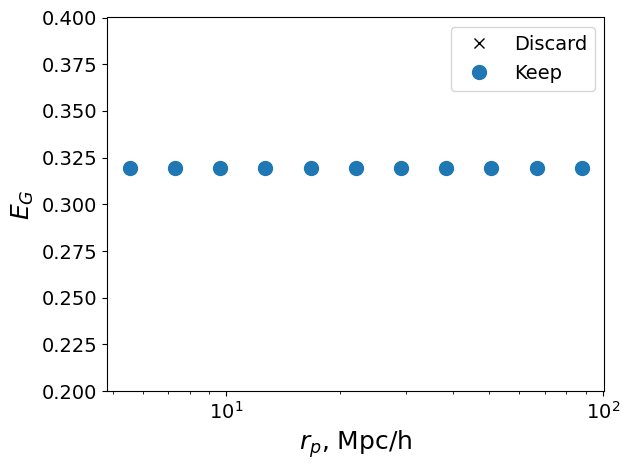

In [22]:
plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gm, Ups_keep_gm, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gm}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,1.2)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gm_linearscales_fRgravity_wHartlap.pdf')
plt.show()

plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gg, Ups_keep_gg, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gg}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,9)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gg_linearscales_fRgravity_wHartlap.pdf')
plt.show()
#plt.savefig('../plots/Upsilon_gg_scales.png')

plt.figure()
plt.semilogx(rp_bin_c, data_nl_EG, 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_Eg, Eg_keep, 'o', markersize='10', label='Keep')
plt.ylabel('$E_G$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.ylim(0.2,0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig('../plots/EG_linearscales_fRgravity_wHartlap.pdf')
plt.show()

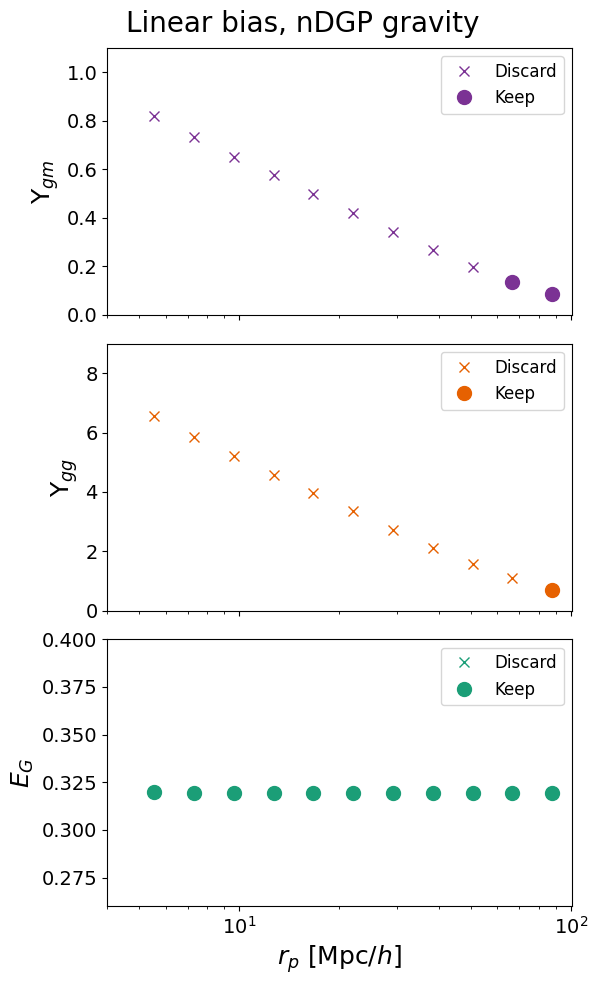

In [23]:
# Define colors
purple = '#7B3294'  # Upsilon_gm
orange = '#E66101'  # Upsilon_gg
teal   = '#1B9E77'  # E_G


fig, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

# --- Panel 1: Upsilon_gm ---
axes[0].semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'x', color=purple, markersize=7, label='Discard')
axes[0].semilogx(rp_keep_gm, Ups_keep_gm, 'o', color=purple, markersize=10, label='Keep')
axes[0].set_ylabel(r'$\Upsilon_{gm}$', fontsize=18)
axes[0].legend(fontsize=12)
axes[0].tick_params(labelsize=14)
axes[0].set_xlim(4, rp_bin_edges[-1])
axes[0].set_ylim(0, 1.1)

# --- Panel 2: Upsilon_gg ---
axes[1].semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'x', color=orange, markersize=7, label='Discard')
axes[1].semilogx(rp_keep_gg, Ups_keep_gg, 'o', color=orange, markersize=10, label='Keep')
axes[1].set_ylabel(r'$\Upsilon_{gg}$', fontsize=18)
axes[1].legend(fontsize=12)
axes[1].tick_params(labelsize=14)
axes[1].set_xlim(4, rp_bin_edges[-1])
axes[1].set_ylim(0, 9)

# --- Panel 3: E_G ---
axes[2].semilogx(rp_bin_c, data_nl_EG, 'x', color=teal, markersize=7, label='Discard')
axes[2].semilogx(rp_keep_Eg, Eg_keep, 'o', color=teal, markersize=10, label='Keep')
axes[2].set_ylabel(r'$E_G$', fontsize=18)
axes[2].set_xlabel(r'$r_p$ [Mpc$/h$]', fontsize=18)
axes[2].legend(fontsize=12)
axes[2].tick_params(labelsize=14)
axes[2].set_xlim(4, rp_bin_edges[-1])
axes[2].set_ylim(0.26, 0.4)

# --- Overall Title ---
fig.suptitle('Linear bias, nDGP gravity', fontsize=20, y=0.98)

plt.tight_layout(h_pad=0.7)
plt.savefig('../plots/linear_bias_linear_cuts_fR_LSSTY10_oct2025.pdf')
plt.show()